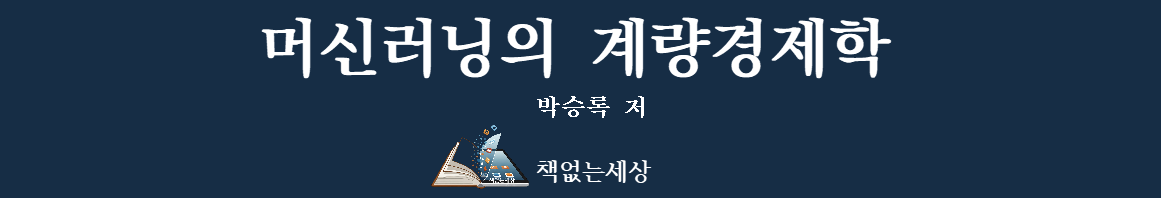

# Part 3: 전통적 계량경제학

## Chapter 3. 최소자승법에서 정규성과 추론

In [5]:
# 작업공간(working directory)지정  
import os  
os.chdir("X:\Econometrics_with_ML")
os.getcwd()

!pip install --upgrade pandas

In [6]:
# exec(open('E:/JupyterWorkingDirectory/MyStock/Functions/Traditional_Econometrics_Lib.py').read())

In [7]:
# #####################################################################
# 위의 함수는 아래 다양한 라이브러리와 함수를 한 문장으로 불러오는 방법
# #####################################################################

# 분석에 사용될 라이브러리(Libraries for the Analysis) 불러오기
# Libraries for the Analysis of Traditional Econometrics.py
# 불러오는 방법:  "exec(open('Functions/Traditional_Econometrics_Lib.py').read())"
# #####################################################################

# 만약 특정 라이브러리가 설치되지 않았다는 에러 메시지가 나타날 때는 
# 해당 라이브러리를 설치하여야 함
# 아래 라이브러리를 하나 하나 실행하면서 어떤 라이브러리가 설치되지 않았는지 확인하여도 됨
# #####################################################################
import os
import numpy as np                                       # Numerical calculations
import pandas as pd                                      # Data handling
import math as someAlias
import matplotlib.dates as mdates                        # Turn dates into numbers
import matplotlib.pyplot as plt                          # Lower-level graphics
import patsy as pt
import seaborn as sns
import stargazer.stargazer as sg
import statsmodels.api as sm
import statsmodels.formula.api as smf                    # Econometrics
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as dg
import statsmodels.stats.outliers_influence as smo
import linearmodels as lm                                # Panel model, Simultaneous Eq. Model
import scipy.stats as stats                              # Statistics
import random

from scipy.optimize import Bounds
from scipy.optimize import curve_fit                    # Nonlinear regression
from scipy.optimize import minimize
from scipy.stats import norm
from statsmodels.graphics import tsaplots               # Time series
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller          # ADF test
from statsmodels.tsa.stattools import coint             # Cointegration
from statsmodels.tsa.vector_ar.vecm import VECM
from arch import arch_model

import wooldridge as woo
#from imfpy.retrievals import dots
import wbdata
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")


## 5. Python을 이용한 회귀분석 절차
### 가. 정규성 테스트

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 colGPA   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     13.92
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           5.65e-08
Time:                        17:00:20   Log-Likelihood:                -41.501
No. Observations:                 141   AIC:                             91.00
Df Residuals:                     137   BIC:                             102.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3896      0.332      4.191      0.000       0.734       2.045
hsGPA          0.4118      0.094      4.396      0.000       0.227       0.597
ACT            0.0147      0.011      1.393      0.166      -0.006       0.036
skipped       -0.0831      0.026     -3.197      0.002      -0.135      -0.032
==============================================================================
Omnibus:                        1.917   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.636
Skew:                           0.125   Prob(JB):                        0.441
Kurtosis:                       2.535   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ShapiroResult(statistic=np.float64(0.9888460911819755), pvalue=np.float64(0.31936968643240427))
SignificanceResult(statistic=np.float64(1.6361179287402952), pvalue=np.float64(0.4412873782663942))


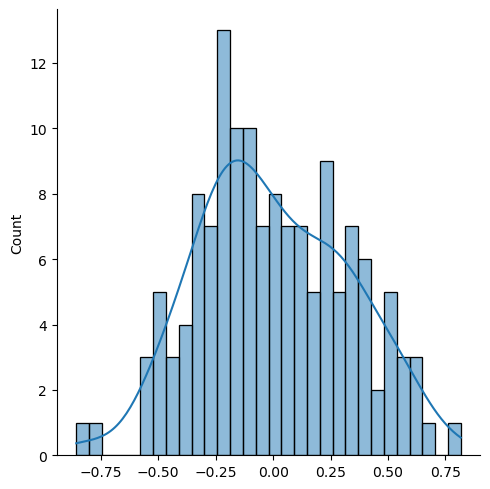

In [8]:
import wooldridge as woo
import statsmodels.formula.api as smf
import scipy.stats as stats

gpa1 = woo.dataWoo('gpa1')

# 모형추정
reg = smf.ols(formula='colGPA ~ hsGPA + ACT + skipped', data=gpa1)
results = reg.fit()
display(results.summary())

# 잔차 
residuals = results.resid

# Shapiro-Wilk test
SW = stats.shapiro(residuals)
print(SW)

# Jarque-Bera test
JB = stats.jarque_bera(residuals)
print(JB)

# 잔차의 히스토 그램
sns.displot(residuals, kde=True, bins=30)


#### 1) 임계치를 이용한 추론

In [9]:
import scipy.stats as stats
import numpy as np

# 유의수준, alpha=5%, 1%, 자유도 522에서 t-분포의 임계치
alpha = np.array([0.05, 0.01])
cv_t = stats.t.ppf(1 - alpha, 522)
print(f'cv_t: {cv_t}\n')

# 유의수준, alpha=5%, 1%에서 정규분포의 임계치
cv_n = stats.norm.ppf(1 - alpha)
print(f'cv_n: {cv_n}\n')

cv_t: [1.64777794 2.33351273]

cv_n: [1.64485363 2.32634787]



#### 2) p-값을 이용한 추론

In [10]:
# 수식에 의한 t값과 p값
b = results.params
se = results.bse
tstat = b / se
pval = 2 * stats.t.cdf(-abs(tstat), 137)
print(f'tstat: \n{tstat}\n')
print(f'pval: \n{pval}\n')

tstat: 
Intercept    4.191039
hsGPA        4.396260
ACT          1.393319
skipped     -3.196840
dtype: float64

pval: 
[4.95026897e-05 2.19205015e-05 1.65779902e-01 1.72543113e-03]



## 다. 회귀모형에 제약조건의 부여

In [11]:
import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats

mlb1 = woo.dataWoo('mlb1')
n = mlb1.shape[0]

# 무제약 회귀(unrestricted OLS regression)
reg_ur = smf.ols(
    formula='np.log(salary) ~ years + gamesyr + bavg + hrunsyr + rbisyr',
    data=mlb1)
fit_ur = reg_ur.fit()
r2_ur = fit_ur.rsquared
print(f'r2_ur: {r2_ur}\n')

# 제약있는 회귀(restricted OLS regression)
reg_r = smf.ols(formula='np.log(salary) ~ years + gamesyr', data=mlb1)
fit_r = reg_r.fit()
r2_r = fit_r.rsquared
print(f'r2_r: {r2_r}\n')

# F-통계량(F statistic) 계산
fstat = (r2_ur - r2_r) / (1 - r2_ur) * (n - 6) / 3
print(f'fstat: {fstat}\n')

# 유의수준 alpha=1%에서 F분포의 임계치 
cv = stats.f.ppf(1 - 0.01, 3, 347)
print(f'cv: {cv}\n')

# F 값의 p-값 (p value = 1-cdf) 
fpval = 1 - stats.f.cdf(fstat, 3, 347)
print(f'fpval: {fpval}\n')

# 함수를 이용한 F test
hypotheses = ['bavg = 0', 'hrunsyr = 0', 'rbisyr = 0']
ftest = fit_ur.f_test(hypotheses)
fstat = ftest.statistic
fpval = ftest.pvalue

print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

# 함수를 이용한 F test: bavg = 0, hrunsyr = 2*rbisyr의 검증
hypotheses1 = ['bavg = 0', 'hrunsyr = 2*rbisyr']
ftest1 = fit_ur.f_test(hypotheses1)
fstat1 = ftest1.statistic
fpval1 = ftest1.pvalue

print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

r2_ur: 0.6278028485187443

r2_r: 0.5970716339066895

fstat: 9.55025352195195

cv: 3.838520048496057

fpval: 4.473708139829391e-06

fstat: 9.55025352195205

fpval: 4.473708139837944e-06

fstat: 9.55025352195205

fpval: 4.473708139837944e-06



## 라. LM 검증 (검증과의 비교)

In [12]:
# Lagrange Multiplier(LM) Test
# 1) 제약있는 회귀(restricted OLS regression)후 R2
reg_r = smf.ols(formula='np.log(salary) ~ years + gamesyr', data=mlb1)
fit_r = reg_r.fit()
r2_r = fit_r.rsquared
residuals = fit_r.resid
print(f'r2_r: {r2_r}\n')

# 2) 제약된 모형 추정결과의 잔차를 모든 독립변수에 대해 회귀분석후 R2
mlb1['residuals'] = fit_r.resid
reg_LM = smf.ols(formula='residuals ~ years + gamesyr + bavg + hrunsyr + rbisyr',
                 data=mlb1)
fit_LM = reg_LM.fit()
r2_LM = fit_LM.rsquared
print(f'r2_LM: {r2_LM}\n')

# 3) LM test statistic 계산
LM = r2_LM * fit_LM.nobs
print(f'LM: {LM}\n')

# 4) alpha=5%에서 Chi 2의 임계치 계산
cv = stats.chi2.ppf(1-0.05, 3)
print(f'cv: {cv}\n')

# 5) p value 계산
pval = 1 - stats.chi2.cdf(LM, 3)
print(f'pval: {pval}\n')

r2_r: 0.5970716339066895

r2_LM: 0.0762696727212746

LM: 26.923194470609936

cv: 7.814727903251179

pval: 6.109719123958968e-06



## 마. 파라미터 추정치의 신뢰 구간 계산

In [13]:
import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats

mlb1 = woo.dataWoo('mlb1')
n = mlb1.shape[0]

reg_ur = smf.ols(
    formula='np.log(salary) ~ years + gamesyr + bavg + hrunsyr + rbisyr',
    data=mlb1)
fit_ur = reg_ur.fit()
display(fit_ur.summary())

# 95%, 99% 신뢰구간(CI)
CI95 = fit_ur.conf_int(0.05)
CI99 = fit_ur.conf_int(0.01)
print(f'CI95: \n{CI95}\n')
print(f'CI99: \n{CI99}\n')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     117.1
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           2.94e-72
Time:                        17:00:20   Log-Likelihood:                -385.11
No. Observations:                 353   AIC:                             782.2
Df Residuals:                     347   BIC:                             805.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1924      0.289     38.752      0.000      10.624      11.760
years          0.0689      0.012      5.684      0.000       0.045       0.093
gamesyr        0.0126      0.003      4.742      0.000       0.007       0.018
bavg           0.0010      0.001      0.887      0.376      -0.001       0.003
hrunsyr        0.0144      0.016      0.899      0.369      -0.017       0.046
rbisyr         0.0108      0.007      1.500      0.134      -0.003       0.025
==============================================================================
Omnibus:                        6.816   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.033   Jarque-Bera (JB):               10.197
Skew:                          -0.068   Prob(JB):                      0.00610
Kurtosis:                       3.821   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

CI95: 
                   0          1
Intercept  10.624355  11.760482
years       0.045035   0.092690
gamesyr     0.007346   0.017758
bavg       -0.001192   0.003149
hrunsyr    -0.017152   0.046011
rbisyr     -0.003346   0.024878

CI99: 
                   0          1
Intercept  10.444346  11.940490
years       0.037485   0.100240
gamesyr     0.005697   0.019407
bavg       -0.001880   0.003837
hrunsyr    -0.027159   0.056018
rbisyr     -0.007818   0.029349



## 6. 모형 추정에서 편리한 수식 정의

### 가. 다양한 수식을 이용한 독립변수의 정의

#### 1) I() 함수를 이용한 회귀식 정의

In [14]:
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf

bwght = woo.dataWoo('bwght')

# 기본 회귀분석과 아웃풋 출력
reg = smf.ols(formula='bwght ~ cigs + faminc', data=bwght)
results = reg.fit()
# print(results.summary())
display(results.summary())

# 변수의 단위변경(수식이용)
bwght['bwght_lbs'] = bwght['bwght'] / 16
reg_lbs = smf.ols(formula='bwght_lbs ~ cigs + faminc', data=bwght)
results_lbs = reg_lbs.fit()
# print(results_lbs.summary())
display(results_lbs.summary())

#  변수의 단위변경(함수 I()이용)
reg_lbs2 = smf.ols(formula='I(bwght/16) ~ cigs + faminc', data=bwght)
results_lbs2 = reg_lbs2.fit()
display(results_lbs2.summary())

reg_packs = smf.ols(formula='bwght ~ I(cigs/20) + faminc', data=bwght)
results_packs = reg_packs.fit()
display(results_packs.summary())

# 파라미터 추정 결과 Data Frame만들어 출력
table = pd.DataFrame({'b': round(results.params, 4),
                      'b_lbs': round(results_lbs.params, 4),
                      'b_lbs2': round(results_lbs2.params, 4),
                      'b_packs': round(results_packs.params, 4)})
display(table)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     21.27
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           7.94e-10
Time:                        17:00:20   Log-Likelihood:                -6130.4
No. Observations:                1388   AIC:                         1.227e+04
Df Residuals:                    1385   BIC:                         1.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.9741      1.049    111.512      0.000     114.916     119.032
cigs          -0.4634      0.092     -5.060      0.000      -0.643      -0.284
faminc         0.0928      0.029      3.178      0.002       0.036       0.150
==============================================================================
Omnibus:                      116.751   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              619.781
Skew:                          -0.154   Prob(JB):                    2.61e-135
Kurtosis:                       6.259   Cond. No.                         67.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              bwght_lbs   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     21.27
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           7.94e-10
Time:                        17:00:20   Log-Likelihood:                -2282.1
No. Observations:                1388   AIC:                             4570.
Df Residuals:                    1385   BIC:                             4586.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3109      0.066    111.512      0.000       7.182       7.439
cigs          -0.0290      0.006     -5.060      0.000      -0.040      -0.018
faminc         0.0058      0.002      3.178      0.002       0.002       0.009
==============================================================================
Omnibus:                      116.751   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              619.781
Skew:                          -0.154   Prob(JB):                    2.61e-135
Kurtosis:                       6.259   Cond. No.                         67.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          I(bwght / 16)   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     21.27
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           7.94e-10
Time:                        17:00:20   Log-Likelihood:                -2282.1
No. Observations:                1388   AIC:                             4570.
Df Residuals:                    1385   BIC:                             4586.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3109      0.066    111.512      0.000       7.182       7.439
cigs          -0.0290      0.006     -5.060      0.000      -0.040      -0.018
faminc         0.0058      0.002      3.178      0.002       0.002       0.009
==============================================================================
Omnibus:                      116.751   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              619.781
Skew:                          -0.154   Prob(JB):                    2.61e-135
Kurtosis:                       6.259   Cond. No.                         67.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     21.27
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           7.94e-10
Time:                        17:00:20   Log-Likelihood:                -6130.4
No. Observations:                1388   AIC:                         1.227e+04
Df Residuals:                    1385   BIC:                         1.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      116.9741      1.049    111.512      0.000     114.916     119.032
I(cigs / 20)    -9.2682      1.832     -5.060      0.000     -12.861      -5.675
faminc           0.0928      0.029      3.178      0.002       0.036       0.150
==============================================================================
Omnibus:                      116.751   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              619.781
Skew:                          -0.154   Prob(JB):                    2.61e-135
Kurtosis:                       6.259   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,b,b_lbs,b_lbs2,b_packs
I(cigs / 20),NaN,NaN,NaN,-9.2682
Intercept,116.9741,7.3109,7.3109,116.9741
cigs,-0.4634,-0.0290,-0.0290,NaN
faminc,0.0928,0.0058,0.0058,0.0928


#### 2) 넘파이 함수식을 이용한 회귀식 정의

In [15]:
# 종속변수 또는 독립변수의 로그변수(함수 no.log() 활용) 또는 2-3차 제곱항 추가(함수 I()사용)
import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf

hprice2 = woo.dataWoo('hprice2')
n = hprice2.shape[0]

reg = smf.ols(
    formula='np.log(price) ~ np.log(nox)+np.log(dist)+rooms+I(rooms**2)+stratio',
    data=hprice2)
results = reg.fit()

# 파라미터에 0의 제약조건부여 타당성 검증을 위한 F test
hypotheses = ['rooms = 0', 'I(rooms ** 2) = 0']
ftest = results.f_test(hypotheses)
fstat = ftest.statistic
fpval = ftest.pvalue

print(f'Fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

Fstat: 110.41878192669498

fpval: 1.919325001952763e-40



### 나. 독립변수의 교차항 활용

In [16]:
# 독립변수의 교차항 활용방법
# 방법1: x1:x2 ,예) y~x1+x2+x1:x2
# 방법2: x1*x2, 예) y~x1*x2  <==> y~x1+x2+x1:x2
# 방법3: x1*(x2+x3), 예) y~x1+x2+x3+x1:x2+x1:x3

import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

attend = woo.dataWoo('attend')
n = attend.shape[0]

reg = smf.ols(formula='stndfnl ~ atndrte*priGPA + ACT + I(priGPA**2) + I(ACT**2)',
              data=attend)
results = reg.fit()

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

table: 
                     b      se       t    pval
Intercept       2.0503  1.3603  1.5072  0.1322
atndrte        -0.0067  0.0102 -0.6561  0.5120
priGPA         -1.6285  0.4810 -3.3857  0.0008
atndrte:priGPA  0.0056  0.0043  1.2938  0.1962
ACT            -0.1280  0.0985 -1.3000  0.1940
I(priGPA ** 2)  0.2959  0.1010  2.9283  0.0035
I(ACT ** 2)     0.0045  0.0022  2.0829  0.0376



### 다. 회귀분석 결과의 한계효과

In [17]:
# 독립변수, atndrte의 한계효과 (priGPA의 평균, 2.59에서 측정)
b = results.params
priGPA_mean = np.mean(attend['priGPA'])
print(f'priGPA_mean: {priGPA_mean}\n')

partial_effect = b['atndrte'] + priGPA_mean * b['atndrte:priGPA']
print(f'partial_effect: {partial_effect}\n')

# 독립변수, atndrte의 한계효과(priGPA=2.59일 때) =0 검증을 위한 F test 
hypotheses = 'atndrte + 2.59 * atndrte:priGPA = 0'
ftest = results.f_test(hypotheses)
fstat = ftest.statistic
fpval = ftest.pvalue

print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

priGPA_mean: 2.586774999078582

partial_effect: 0.007736557672637947

fstat: 8.632581056741202

fpval: 0.0034149923995847836



### 라. 예측(Predict)과 예측치의 신뢰 구간

In [18]:
import wooldridge as woo
import statsmodels.formula.api as smf
import pandas as pd

gpa2 = woo.dataWoo('gpa2')

reg = smf.ols(formula='colgpa ~ sat + hsperc + hsize + I(hsize**2)', data=gpa2)
results = reg.fit()

# 예측대상 독립변수
cvalues2 = pd.DataFrame({'sat': [1200, 900, 1400, 1000, 1300],
                         'hsperc': [30, 20, 5, 22, 10], 
                         'hsize': [5, 3, 6, 4, 5]},
                         index=['newPerson1', 'newPerson2', 'newPerson3', 'newPerson4', 'newPerson5'])

# 점예측(point estimates)와 95% 신뢰 구간(confidence intervals) 및 예측 구간(prediction intervals)
# 점예측과 동시에 예측 구간까지 계산할 때는 .get_prediction()사용
colgpa_PICI_95 = results.get_prediction(cvalues2).summary_frame(alpha=0.05)
display(colgpa_PICI_95)

# 점예측(point estimates)와 99% 신뢰 구간(confidence intervals) 및 예측 구간(prediction intervals)
colgpa_PICI_99 = results.get_prediction(cvalues2).summary_frame(alpha=0.01)
display(colgpa_PICI_99)

# 단순히 점예측만 할 때는 .predict() 사용
colgpa_pred = results.predict(cvalues2)
display(colgpa_pred)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.700075,0.019878,2.661104,2.739047,1.601749,3.798402
1,2.425282,0.014258,2.397329,2.453235,1.327292,3.523273
2,3.344151,0.029893,3.285544,3.402759,2.244953,4.443349
3,2.524161,0.013219,2.498245,2.550077,1.426221,3.622102
4,3.126441,0.021470,3.084348,3.168534,2.028000,4.224882


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.700075,0.019878,2.648850,2.751301,1.256386,4.143765
1,2.425282,0.014258,2.388540,2.462025,0.982034,3.868530
2,3.344151,0.029893,3.267115,3.421187,1.899316,4.788987
3,2.524161,0.013219,2.490096,2.558226,1.080979,3.967343
4,3.126441,0.021470,3.071112,3.181770,1.682600,4.570281


newPerson1    2.700075
newPerson2    2.425282
newPerson3    3.344151
newPerson4    2.524161
newPerson5    3.126441
dtype: float64

X: 
   rooms       nox      dist    stratio
0    4.0  5.549783  3.795751  18.459289
1    5.0  5.549783  3.795751  18.459289
2    6.0  5.549783  3.795751  18.459289
3    7.0  5.549783  3.795751  18.459289
4    8.0  5.549783  3.795751  18.459289

lpr_CI: 
        mean  mean_ci_lower  mean_ci_upper
0   9.661702       9.499811       9.823593
1   9.676940       9.610215       9.743665
2   9.816700       9.787055       9.846345
3  10.080983      10.042409      10.119557
4  10.469788      10.383361      10.556215



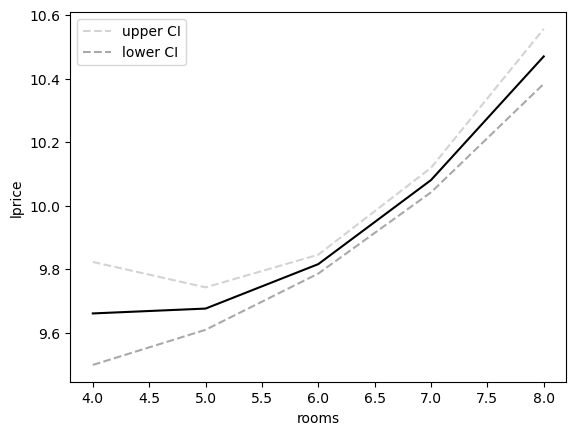

In [19]:
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

hprice2 = woo.dataWoo('hprice2')
hprice2.describe()

# 주택가격 예측 모형
reg = smf.ols(
    formula='np.log(price) ~ np.log(nox)+np.log(dist)+rooms+I(rooms**2)+stratio',
    data=hprice2)
results = reg.fit()

# 다른 변수의 평균값에서 룸(rooms) = 4-8에 대한 예측의 신뢰 구간 계산
nox_mean = np.mean(hprice2['nox'])
dist_mean = np.mean(hprice2['dist'])
stratio_mean = np.mean(hprice2['stratio'])
X = pd.DataFrame({'rooms': np.linspace(4, 8, num=5),
                  'nox': nox_mean,
                  'dist': dist_mean,
                  'stratio': stratio_mean})
print(f'X: \n{X}\n')

# 예측의 95% 신뢰 구간:
lpr_PICI = results.get_prediction(X).summary_frame(alpha=0.05)
lpr_CI = lpr_PICI[['mean', 'mean_ci_lower', 'mean_ci_upper']]
print(f'lpr_CI: \n{lpr_CI}\n')

# 예측의 신뢰 구간 도표화
plt.plot(X['rooms'], lpr_CI['mean'], color='black',
         linestyle='-', label='')
plt.plot(X['rooms'], lpr_CI['mean_ci_upper'], color='lightgrey',
         linestyle='--', label='upper CI')
plt.plot(X['rooms'], lpr_CI['mean_ci_lower'], color='darkgrey',
         linestyle='--', label='lower CI')
plt.ylabel('lprice')
plt.xlabel('rooms')
plt.legend()
plt.show()


X: 
      rooms       nox      dist    stratio
0  3.000000  5.549783  3.795751  18.459289
1  3.857143  5.549783  3.795751  18.459289
2  4.714286  5.549783  3.795751  18.459289
3  5.571429  5.549783  3.795751  18.459289
4  6.428571  5.549783  3.795751  18.459289
5  7.285714  5.549783  3.795751  18.459289
6  8.142857  5.549783  3.795751  18.459289
7  9.000000  5.549783  3.795751  18.459289



,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,9.770987,0.157157,9.462217,10.079757,9.175420,10.366554
1,9.669691,0.091493,9.489931,9.849450,9.129621,10.209760
2,9.659880,0.045013,9.571443,9.748317,9.142983,10.176777
3,9.741555,0.019246,9.703743,9.779368,9.230878,10.252233
4,9.914717,0.015323,9.884612,9.944821,9.404552,10.424881
5,10.179364,0.023966,10.132277,10.226450,9.667916,10.690811
6,10.535497,0.049682,10.437884,10.633109,10.016951,11.054042
7,10.983115,0.095499,10.795486,11.170744,10.440376,11.525855


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,17518.045778,1.170179,12864.373872,23855.177944,9656.818884,31778.780525
1,15830.449110,1.095810,13225.888687,18947.922893,9224.526760,27167.043421
2,15675.904508,1.046041,14349.106527,17125.385588,9348.609318,26285.618937
3,17009.978969,1.019432,16378.800973,17665.480214,10207.500786,28345.761669
4,20225.847957,1.015441,19626.029947,20843.997828,12143.533816,33687.469544
5,26353.693698,1.024255,25141.555731,27624.271901,15802.383487,43950.152971
6,37627.732147,1.050937,34128.375341,41485.895897,22403.015260,63198.913632
7,58871.674388,1.100208,48800.041767,71021.948337,34213.508240,101301.334575


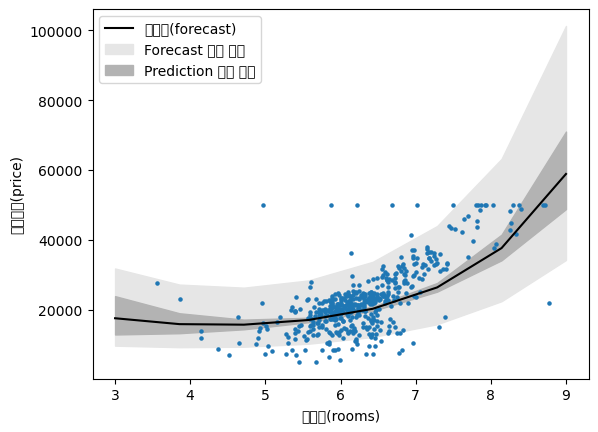

In [20]:
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

hprice2 = woo.dataWoo('hprice2')
hprice2.describe()
# 다중회귀함수 추정
reg = smf.ols(
    formula='np.log(price) ~ np.log(nox)+np.log(dist)+rooms+I(rooms**2)+stratio',
    data=hprice2)
results = reg.fit()

# rooms변수는 3-10 구간 정의, 다른 모든 변수는 평균값을 계산 
nox_mean = np.mean(hprice2['nox'])
dist_mean = np.mean(hprice2['dist'])
stratio_mean = np.mean(hprice2['stratio'])

X = pd.DataFrame({'rooms': np.linspace(3, 9, num=8),
                  'nox': nox_mean,
                  'dist': dist_mean,
                  'stratio': stratio_mean})
print(f'X: \n{X}\n')

# 예측치와 95% 신뢰구간 계산(이때는 predict와 forcast의 개념 구분 필요)
lpr_PICI = results.get_prediction(X).summary_frame(alpha=0.05)
display(lpr_PICI)

# 종속변수가 로그변환된 것이므로 예측치는 지수변환
price_fit = np.exp(lpr_PICI)

display(price_fit)

# 예측에서 Predict와 Forecast 신뢰 구간의 차이
plt.plot(X['rooms'], price_fit['mean'], color='black',
         linestyle='-', label='예측치(forecast)')
plt.fill_between(X['rooms'], price_fit['obs_ci_lower'], price_fit['obs_ci_upper'],
                  color='0.9', label='Forecast 신뢰 구간')
plt.fill_between(X['rooms'], price_fit['mean_ci_lower'], price_fit['mean_ci_upper'],
                  color='0.7', label='Prediction 신뢰 구간')
plt.scatter(hprice2['rooms'],hprice2['price'], s=5)
plt.ylabel('주택가격(price)')
plt.xlabel('룸개수(rooms)')
plt.legend(loc='upper left')
plt.show()

## 7. 회귀모형의 몬테칼로 실험 사례

### 가. 단순회귀모형의 몬테칼로 실험
#### 1) 하나의 표본

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     2845.
Date:                Mon, 18 Aug 2025   Prob (F-statistic):          1.89e-294
Time:                        17:00:21   Log-Likelihood:                -725.74
No. Observations:                1000   AIC:                             1455.
Df Residuals:                     998   BIC:                             1465.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9891      0.034     88.975      0.0

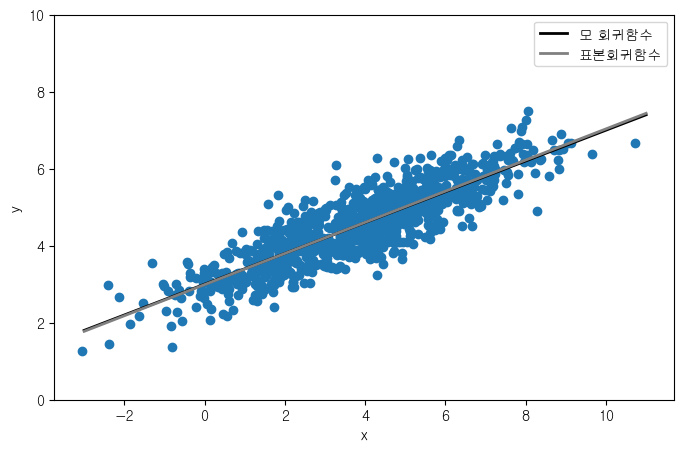

In [21]:
# ##########################################
# 회귀모형 몬테칼로 시뮬레이션(1 sample) ###
# ##########################################

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt

# 한글 폰트 사용
import matplotlib
from matplotlib import font_manager, rc
font_location='C:/Windows/Fonts/NGULIM.ttf'
font_name =font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# random seed 부여
np.random.seed(123456)

# 표본 개수
n = 1000

# 모 회귀 파라미터 정의(true parameters, betas and sd of u)
beta0 = 3
beta1 = 0.4

# n개의 표본생성
x = stats.norm.rvs(4, 2, size=n)
u = stats.norm.rvs(0, 0.5, size=n)
y = beta0 + beta1 * x + u
df = pd.DataFrame({'y': y, 'x': x})

# OLS 추정치
reg = smf.ols(formula='y ~ x', data=df)
results = reg.fit()
b = results.params
print(results.summary())

# 그래프 그리기
x_range = np.linspace(-3, 11, num=140)
plt.figure(figsize =(8, 5))
plt.ylim([0, 10])
plt.scatter(x, y)
plt.plot(x_range, beta0 + beta1 * x_range, color='black',
         linestyle='-', linewidth=2, label='모 회귀함수')
plt.plot(x_range, b[0] + b[1] * x_range, color='grey',
         linestyle='-', linewidth=2, label='표본회귀함수')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

#### 2) 복수의 표본

b0_mean: 2.999409235653556

b1_mean: 0.4000538341107627

b0_var: 0.0011157235254103798

b1_var: 5.679925795422033e-05



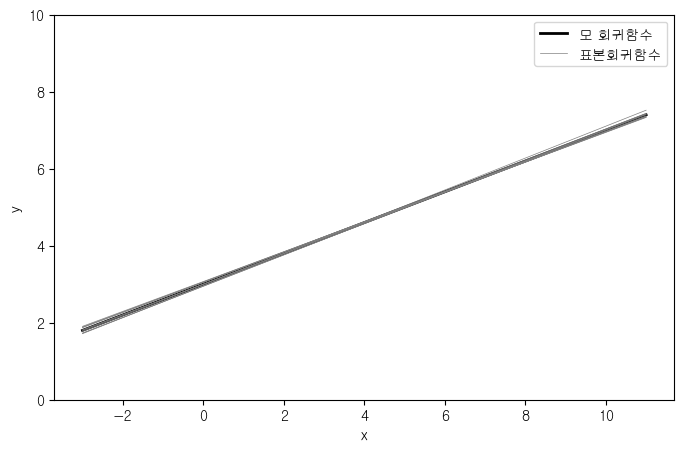

In [22]:
# ###############################################
# 회귀모형 몬테칼로 시뮬레이션(복수의 sample) ###
# ###############################################

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt

# 시드값 부여
np.random.seed(123456)

# 표본 수와 반복횟수
n = 1000
r = 10000

# 베타값과 그 표준편차
beta0 = 3
beta1 = 0.4

# b값 초기화
b0 = np.empty(r)
b1 = np.empty(r)

# x값은 고정(fixed)반영하기 위해 for문 바깥에 위치시킴
x = stats.norm.rvs(4, 2, size=n)

# r번 반복 실혐
for i in range(r):
    # Case 1): 오차항은 동분산, x와 상관되지 않음
    u = stats.norm.rvs(0, 0.5, size=n)
#    # Case 2): 오차항은 x와 상관
#    u_mean = np.array((x-4)/2)
#    u = stats.norm.rvs(u_mean, 0.5, size=n)
#    # Case 3): 오차항은 이분산 
#    u_var = np.array(4/np.exp(2.5)*np.exp(x))
#    u = stats.norm.rvs(0, np.sqrt(u_var), size=n)
    
    y = beta0 + beta1 * x + u
    df = pd.DataFrame({'y': y, 'x': x})

    reg = smf.ols(formula='y ~ x', data=df)
    results = reg.fit()
    b0[i] = results.params['Intercept']
    b1[i] = results.params['x']

# b1, b2추정치의 평균
b0_mean = np.mean(b0)
b1_mean = np.mean(b1)

print(f'b0_mean: {b0_mean}\n')
print(f'b1_mean: {b1_mean}\n')

# b1, b2추정치의 분산
b0_var = np.var(b0, ddof=1)
b1_var = np.var(b1, ddof=1)

print(f'b0_var: {b0_var}\n')
print(f'b1_var: {b1_var}\n')

# 그래프 그리기
plt.figure(figsize =(8, 5))
x_range = np.linspace(-3, 11, num=140)
plt.ylim([0, 10])

# 모회귀방정식 
plt.plot(x_range, beta0 + beta1 * x_range, color='black',
         linestyle='-', linewidth=2, label='모 회귀함수')

# 표본회귀방정식(10000개 표본회귀 방정식중 첫번째)
plt.plot(x_range, b0[0] + b1[0] * x_range, color='grey',
         linestyle='-', linewidth=0.5, label='표본회귀함수')

# 반복회수별 표본회귀선
for i in range(1, 10):
    plt.plot(x_range, b0[i] + b1[i] * x_range, color='grey',
             linestyle='-', linewidth=0.5)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

#### 2) 독립변수와 오차항의 독립성 위배

b0_mean: 1.6660759023202227

b1_mean: 0.7333871674440963

b0_var: 0.0011157235254103796

b1_var: 5.679925795422033e-05



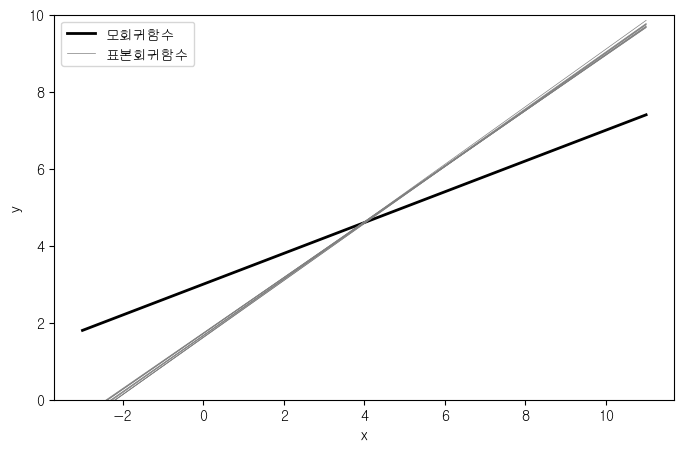

In [23]:
# ###############################################
# 회귀모형 몬테칼로 시뮬레이션(복수의 sample) ###
# ###############################################

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt

# 시드값 부여
np.random.seed(123456)

# 표본수와 반복횟수
n = 1000
r = 10000

# 베타값과 그 표준편차
beta0 = 3
beta1 = 0.4

# b값 초기화
b0 = np.empty(r)
b1 = np.empty(r)

# x값은 고정(fixed)반영하기 위해 for문 바깥에 위치시킴
x = stats.norm.rvs(4, 2, size=n)

# r번 반복 실혐
for i in range(r):
#    # Case 1): 오차항은 동분산, x와 상관되지 않음
#    u = stats.norm.rvs(0, 0.5, size=n)
    # Case 2): 오차항은 x와 상관
    u_mean = np.array((x-4)/3)
    u = stats.norm.rvs(u_mean, 0.5, size=n)
#    # Case 3): 오차항은 이분산 
#    u_var = np.array(4/np.exp(2.5)*np.exp(x))
#    u = stats.norm.rvs(0, np.sqrt(u_var), size=n)
    
    y = beta0 + beta1 * x + u
    df = pd.DataFrame({'y': y, 'x': x})

    reg = smf.ols(formula='y ~ x', data=df)
    results = reg.fit()
    b0[i] = results.params['Intercept']
    b1[i] = results.params['x']

# b1, b2추정치의 평균
b0_mean = np.mean(b0)
b1_mean = np.mean(b1)

print(f'b0_mean: {b0_mean}\n')
print(f'b1_mean: {b1_mean}\n')

# b1, b2추정치의 분산
b0_var = np.var(b0, ddof=1)
b1_var = np.var(b1, ddof=1)

print(f'b0_var: {b0_var}\n')
print(f'b1_var: {b1_var}\n')

# 그래프 그리기
plt.figure(figsize =(8, 5))
x_range = np.linspace(-3, 11, num=140)
plt.ylim([0, 10])

# 모회귀방정식 
plt.plot(x_range, beta0 + beta1 * x_range, color='black',
         linestyle='-', linewidth=2, label='모회귀함수')

# 표본회귀방정식(10000개 표본회귀 방정식중 첫번째)
plt.plot(x_range, b0[0] + b1[0] * x_range, color='grey',
         linestyle='-', linewidth=0.5, label='표본회귀함수')

# 반복회수별 표본회귀선
for i in range(1, 10):
    plt.plot(x_range, b0[i] + b1[i] * x_range, color='grey',
             linestyle='-', linewidth=0.5)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

#### 2) 오차항의 동분산 위배(이분산)

b0_mean: 2.9981622780378596

b1_mean: 0.40026410518113875

b0_var: 0.1393366168825143

b1_var: 0.015395192870880722



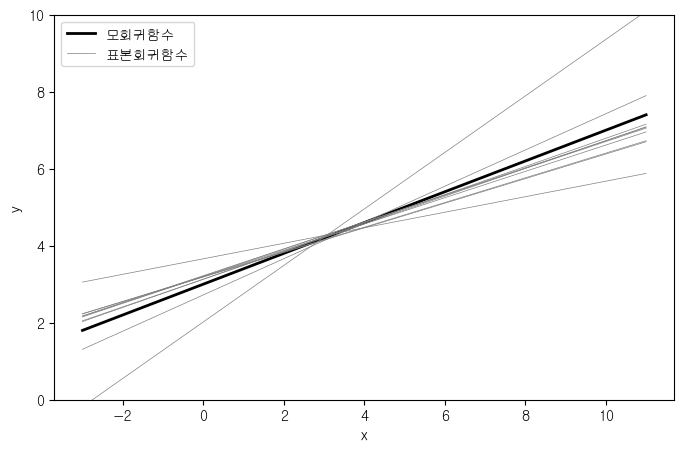

In [24]:
 # ###############################################
# 회귀모형 몬테칼로 시뮬레이션(복수의 sample) ###
# ###############################################

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt

# 시드값 부여
np.random.seed(123456)

# 표본수와 반복횟수
n = 1000
r = 10000

# 베타값과 그 표준편차
beta0 = 3
beta1 = 0.4

# b값 초기화
b0 = np.empty(r)
b1 = np.empty(r)

# x값은 고정(fixed)반영하기 위해 for문 바깥에 위치시킴
x = stats.norm.rvs(4, 2, size=n)

# r번 반복 실혐
for i in range(r):
#    # Case 1): 오차항은 동분산, x와 상관되지 않음
#    u = stats.norm.rvs(0, 0.5, size=n)
#    # Case 2): 오차항은 x와 상관
#    u_mean = np.array((x-4)/3)
#    u = stats.norm.rvs(u_mean, 0.5, size=n)
    # Case 3): 오차항은 이분산 
    u_var = np.array(4/np.exp(4.5)*np.exp(x))
    u = stats.norm.rvs(0, np.sqrt(u_var), size=n)
    
    y = beta0 + beta1 * x + u
    df = pd.DataFrame({'y': y, 'x': x})

    reg = smf.ols(formula='y ~ x', data=df)
    results = reg.fit()
    b0[i] = results.params['Intercept']
    b1[i] = results.params['x']

# b1, b2추정치의 평균
b0_mean = np.mean(b0)
b1_mean = np.mean(b1)

print(f'b0_mean: {b0_mean}\n')
print(f'b1_mean: {b1_mean}\n')

# b1, b2추정치의 분산
b0_var = np.var(b0, ddof=1)
b1_var = np.var(b1, ddof=1)

print(f'b0_var: {b0_var}\n')
print(f'b1_var: {b1_var}\n')

# 그래프 그리기
plt.figure(figsize =(8, 5))
x_range = np.linspace(-3, 11, num=140)
plt.ylim([0, 10])

# 모회귀방정식 
plt.plot(x_range, beta0 + beta1 * x_range, color='black',
         linestyle='-', linewidth=2, label='모회귀함수')

# 표본회귀방정식(10000개 표본회귀 방정식중 첫번째)
plt.plot(x_range, b0[0] + b1[0] * x_range, color='grey',
         linestyle='-', linewidth=0.5, label='표본회귀함수')

# 반복회수별 표본회귀선
for i in range(1, 10):
    plt.plot(x_range, b0[i] + b1[i] * x_range, color='grey',
             linestyle='-', linewidth=0.5)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

### 나. 최소자승법의 점근적 특성의 이해를 위한 몬테칼로 실험

#### 1) 오차항이 정규분포

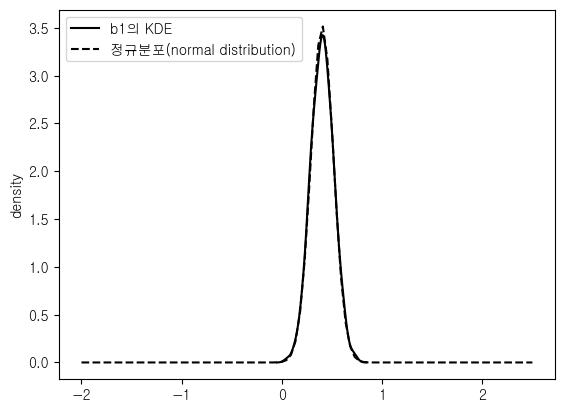

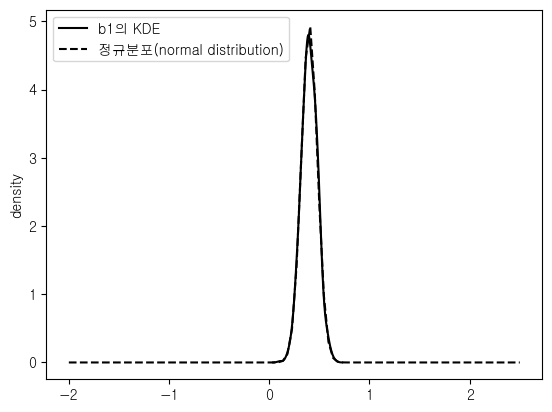

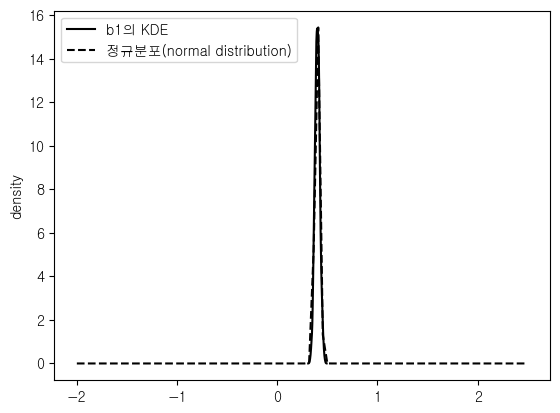

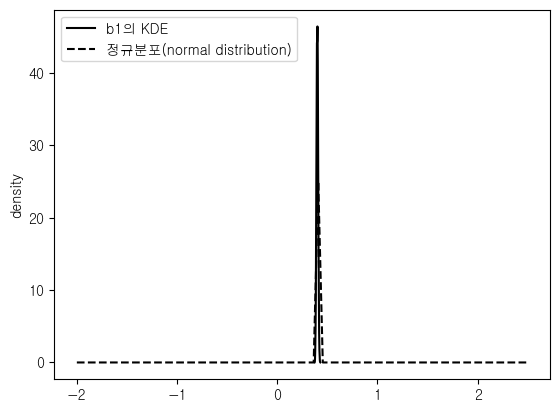

In [25]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

# 난수의 시드(random seed) 부여
np.random.seed(123456)

# 샘플 사이즈(sample size, n)와 반복(simulations, r)횟수 설정 
n = [5, 10, 100, 1000]
r = 1000

# 모수(true parameters)값 설정
beta0 = 3
beta1 = 0.4

for j in n:
    # b1 추정치 보관 장소 
    b1 = np.empty(r)
    # X 표본생성, 반복하는 동안 일정함(fixed over replications)
    X = stats.norm.rvs(4, 2, size=j)

    # r번 반복(Simulation)
    for i in range(r):
        # 오차항 u 생성(정규분포)
        u = stats.norm.rvs(0, 0.5, size=j)  # 정규분포 #
        y = beta0 + beta1 * X + u
        df = pd.DataFrame({'y': y, 'X': X})

        # X에 대해 조건부적인 회귀식 추정(conditional OLS)
        reg = smf.ols(formula='y ~ X', data=df)
        results = reg.fit()
        b1[i] = results.params['X']

    # b1 추정치 분포의 KDE
    kde = sm.nonparametric.KDEUnivariate(b1)
    kde.fit()
    
    # b1 추정치의 정규분포
    X_range = np.linspace(-2, 2.5, num=100)
    y = stats.norm.pdf(X_range, np.mean(b1), np.std(b1))

    plt.plot(kde.support, kde.density, color='black', label='b1의 KDE')
    plt.plot(X_range, y, linestyle='--', color='black', label='정규분포(normal distribution)')
    plt.ylabel('density')
    plt.xlabel('')
    plt.legend()
    plt.show()

#### 2) 오차항이 비정규분포(카이자승 분포)

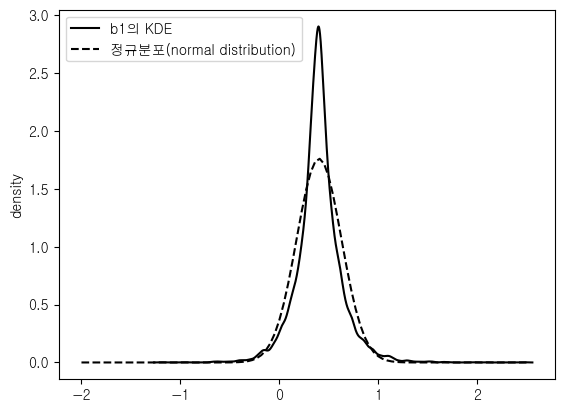

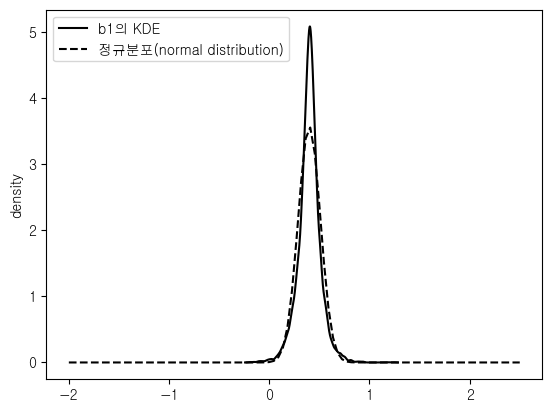

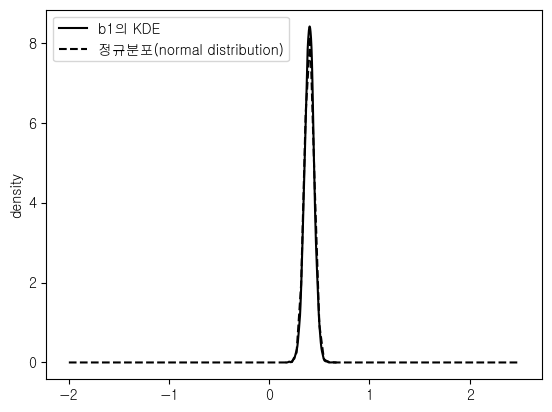

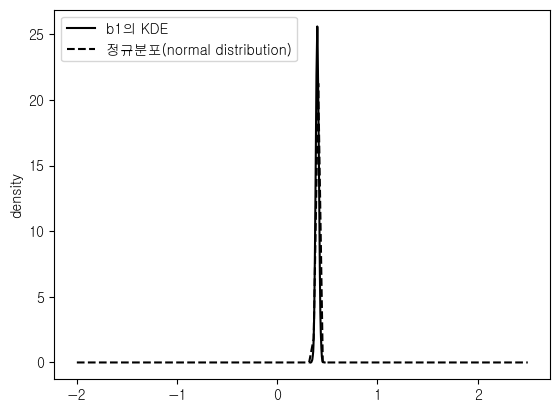

In [26]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

# 난수의 시드(random seed) 부여
np.random.seed(123456)

# 샘플 사이즈(sample size, n)와 반복(simulations, r)횟수 설정 
n = [5, 10, 100, 1000]
r = 10000

# 모수(true parameters)값 설정
beta0 = 3
beta1 = 0.4

for j in n:
    # b1 추정치 보관 장소 
    b1 = np.empty(r)
    # X 표본생성, 반복하는 동안 일정함(fixed over replications)
    X = stats.norm.rvs(4, 2, size=j)

    # r번 반복(Simulation)
    for i in range(r):
        # 오차항 u 생성(카이자승 분포)
        u = (stats.chi2.rvs(1, size=j) - 1) / np.sqrt(2) 
        y = beta0 + beta1 * X + u
        df = pd.DataFrame({'y': y, 'X': X})

        # X에 대해 비조건부적인 회귀식 추정(non-conditional OLS)
        reg = smf.ols(formula='y ~ X', data=df)
        results = reg.fit()
        b1[i] = results.params['X']

    # b1 추정치 분포의 KDE
    kde = sm.nonparametric.KDEUnivariate(b1)
    kde.fit()
    
    # b1 추정치의 정규분포
    X_range = np.linspace(-2, 2.5, num=100)
    y = stats.norm.pdf(X_range, np.mean(b1), np.std(b1))

    plt.plot(kde.support, kde.density, color='black', label='b1의 KDE')
    plt.plot(X_range, y, linestyle='--', color='black', label='정규분포(normal distribution)')
    plt.ylabel('density')
    plt.xlabel('')
    plt.legend()
    plt.show()

### 다. 최소자승법에서 “독립변수에 대한 조건부”의 이해를 위한 몬테칼로 실험

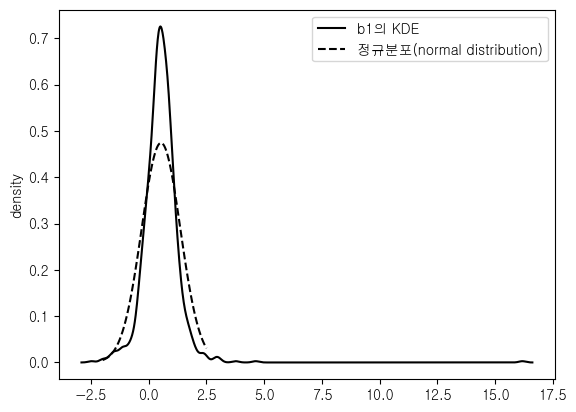

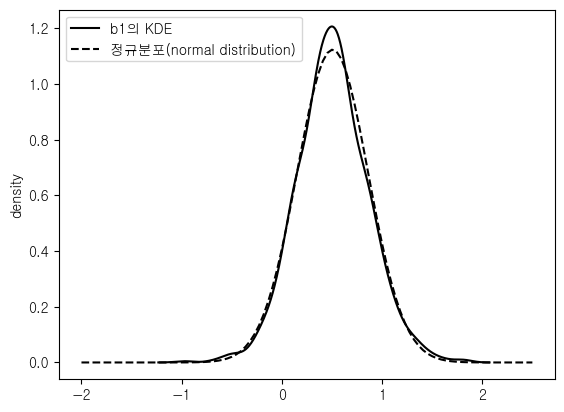

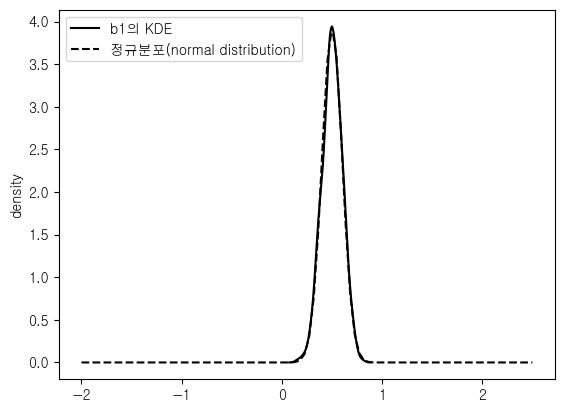

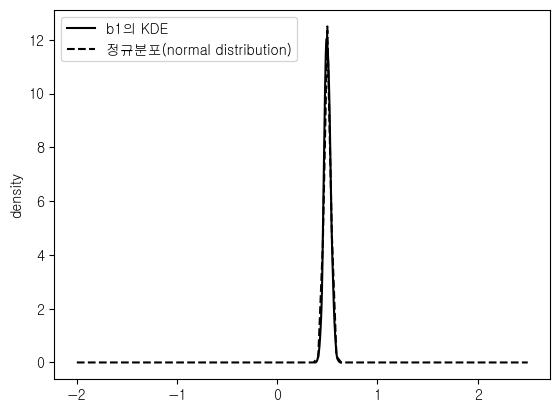

In [27]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

# 난수의 시드(random seed) 부여
np.random.seed(123456)

# 샘플 사이즈(sample size, n)와 반복(simulations, r)횟수 설정 
n = [5, 10, 100, 1000]
r = 1000

# 모수(true parameters)값 설정
beta0 = 1
beta1 = 0.5
sx = 1
ex = 4

for j in n:
    # b1 추정치 보관 장소 
    b1 = np.empty(r)
    # r번 반복(Simulation)
    for i in range(r):
        # 반복때마다 X변수 새로 생성(X가 for문 내측에서 생성됨)
        X = stats.norm.rvs(ex, sx, size=j)
        # 오차항 u 생성(정규분포)
        u = stats.norm.rvs(0, 1, size=j)
        y = beta0 + beta1 * X + u
        df = pd.DataFrame({'y': y, 'X': X})

        # X에 대해 조건부적인 회귀식 추정(conditional OLS)
        reg = smf.ols(formula='y ~ X', data=df)
        results = reg.fit()
        b1[i] = results.params['X']

    # b1 추정치 분포의 KDE
    kde = sm.nonparametric.KDEUnivariate(b1)
    kde.fit()
    
    # b1 추정치의 정규분포
    X_range = np.linspace(-2, 2.5, num=100)
    y = stats.norm.pdf(X_range, np.mean(b1), np.std(b1))

    plt.plot(kde.support, kde.density, color='black', label='b1의 KDE')
    plt.plot(X_range, y, linestyle='--', color='black', label='정규분포(normal distribution)')
    plt.ylabel('density')
    plt.xlabel('')
    plt.legend()
    plt.show()

### 라. 측정오차의 이해를 위한 몬테칼로 실험
#### 1) 종속변수의 측정오차 문제

b1_mean: 0.39982845590529753

b1_me_mean: 0.4000587947734705

b1_var: 0.0002307114236511286

b1_me_var: 0.00045720832565938137



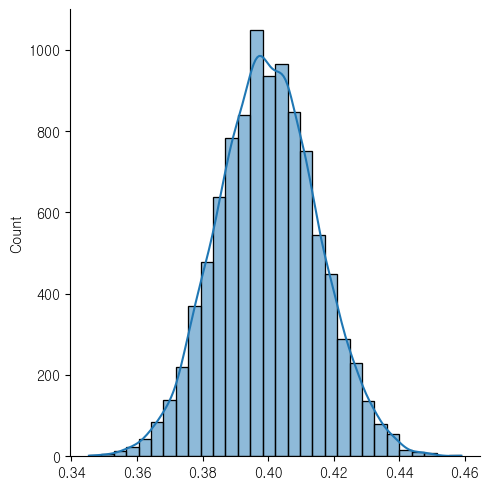

In [28]:
# ###############################
# 측정오차(Measurement Error) ###
# ###############################

# 종속변수 y에 측정오차의 문제가 있을 때
import numpy as np
import scipy.stats as stats
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

# random seed
np.random.seed(123456)

# sample size와 시뮬레이션 반복횟수
n = 1000
r = 10000

# 모수값 (parameters: betas)
beta0 = 2
beta1 = 0.4

# 측정오차가 없을때와 있을때의 기울치 추정치 배열
b1    = np.empty(r)
b1_me = np.empty(r)

# 시뮬레이션 반복시에 고정된 X값(condinal regression)
x = stats.norm.rvs(4, 2, size=n)

# 시뮬레이션 r회 반복
for i in range(r):
    # 오차항 u
    u = stats.norm.rvs(0, 1, size=n)

    # 종속변수 생성(ystar)
    ystar = beta0 + beta1 * x + u
    # 측정오차가 있는 y값 생성
    e0 = stats.norm.rvs(0, 1, size=n)
    y = ystar + e0
    df = pd.DataFrame({'ystar': ystar, 'y': y, 'x': x})

    # 측정오차가 없는 ystar에 대한 회귀분석, 기울기 추정치 보관
    reg_star = smf.ols(formula='ystar ~ x', data=df)
    results_star = reg_star.fit()
    b1[i] = results_star.params['x']

    # 측정오차가 있는 y에 대한 회귀분석, 기울기 추정치 보관
    reg_me = smf.ols(formula='y ~ x', data=df)
    results_me = reg_me.fit()
    b1_me[i] = results_me.params['x']

# 종속변수에 측정오차가 있을 때와 없을때 기울기 파라미터 추정치 평균
b1_mean = np.mean(b1)
b1_me_mean = np.mean(b1_me)
print(f'b1_mean: {b1_mean}\n')
print(f'b1_me_mean: {b1_me_mean}\n')

# 종속변수에 측정오차가 있을 때와 없을때 기울기 파라미터 추정치의 분산
b1_var = np.var(b1, ddof=1)
b1_me_var = np.var(b1_me, ddof=1)
print(f'b1_var: {b1_var}\n')
print(f'b1_me_var: {b1_me_var}\n')

sns.displot(b1, kde=True, bins=30)

#### 2) 독립변수의 측정오차 문제

b1_mean: 0.40238022525347356

b1_me_mean: 0.3234316403359277

b1_var: 0.002599904576109093

b1_me_var: 0.0021674521105484296



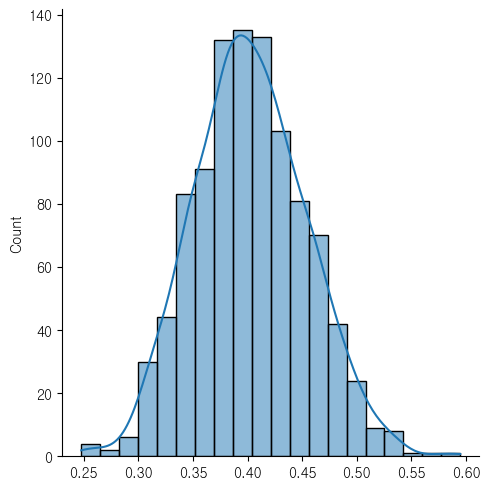

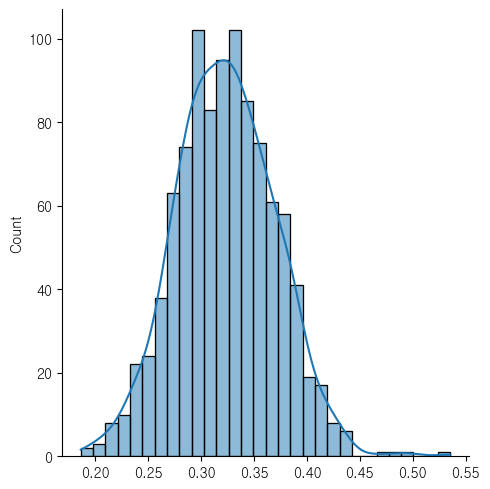

In [29]:
# 독립변수 X에 측정오차의 문제가 있을 때
import numpy as np
import scipy.stats as stats
import pandas as pd
import statsmodels.formula.api as smf

# random seed 설정
np.random.seed(123456)

# sample size와 시뮬레이션 반복횟수
n = 100
r = 1000

# 모수값 (parameters: betas)
beta0 = 2
beta1 = 0.4

# 측정오차가 없을때와 있을때의 기울치 추정치 배열
b1 = np.empty(r)
b1_me = np.empty(r)

# 시뮬레이션 반복시에 고정된 X값(conditional regression)
xstar = stats.norm.rvs(4, 2, size=n)

# 시뮬레이션 r회 반복
for i in range(r):
    # draw a sample of u:
    u = stats.norm.rvs(0, 1, size=n)
    # 측정오차없는 종속변수 생성(y)
    y = beta0 + beta1 * xstar + u
    # 측정오차가 있는 x값 생성
    e1 = stats.norm.rvs(0, 1, size=n)
    x = xstar + e1
    df = pd.DataFrame({'y': y, 'xstar': xstar, 'x': x})
    # 측정오차가 없는 xstar에 대한 회귀분석, 기울기 추정치 보관
    reg_star = smf.ols(formula='y ~ xstar', data=df)
    results_star = reg_star.fit()
    b1[i] = results_star.params['xstar']
    # 측정오차가 있는 x에 대한 회귀분석, 기울기 추정치 보관
    reg_me = smf.ols(formula='y ~ x', data=df)
    results_me = reg_me.fit()
    b1_me[i] = results_me.params['x']

# 독립변수에 측정오차가 없을 때와 있을 때 기울기 파라미터 추정치 평균
b1_mean = np.mean(b1)
b1_me_mean = np.mean(b1_me)
print(f'b1_mean: {b1_mean}\n')
print(f'b1_me_mean: {b1_me_mean}\n')

# 독립변수에 측정오차가 없을 때와 있을 때 기울기 파라미터 추정치의 분산
b1_var = np.var(b1, ddof=1)
b1_me_var = np.var(b1_me, ddof=1)
print(f'b1_var: {b1_var}\n')
print(f'b1_me_var: {b1_me_var}\n')

sns.displot(b1, kde=True, bins=20)

sns.displot(b1_me, kde=True, bins=30)
